In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model

Base = automap_base()

Base.prepare(autoload_with=engine)

# reflect the tables
Base.classes.keys()

['measurement', 'station']

In [7]:
# View all of the classes that automap found

measurement = Base.classes.measurement
station = Base.classes.station





In [8]:
#Create a session
session = Session(engine)



In [9]:
# Save references to each table
results_measurements = session.query(measurement).all()
results_stations = session.query(station).all()    

In [10]:
# Create our session (link) from Python to the DB
Session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
latest_date = session.query(func.max(measurement.date)).scalar()
latest_date

'2017-08-23'

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

last_12_months = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date >= '2016-08-23').\
    order_by(measurement.date).all()
last_12_months


[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [13]:
#Load the query results into a Pandas DataFrame. Explicitly set the column names.

df1 = pd.DataFrame(last_12_months, columns=['date', 'prcp'])
df1.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [14]:
#Sort the DataFrame values by "date".

df1 = df1.sort_values(by='date')
print(df1)

            date  prcp
0     2016-08-23  0.00
1     2016-08-23  0.15
2     2016-08-23  0.05
3     2016-08-23   NaN
4     2016-08-23  0.02
...          ...   ...
2225  2017-08-22  0.50
2228  2017-08-23  0.08
2226  2017-08-23  0.00
2227  2017-08-23  0.00
2229  2017-08-23  0.45

[2230 rows x 2 columns]


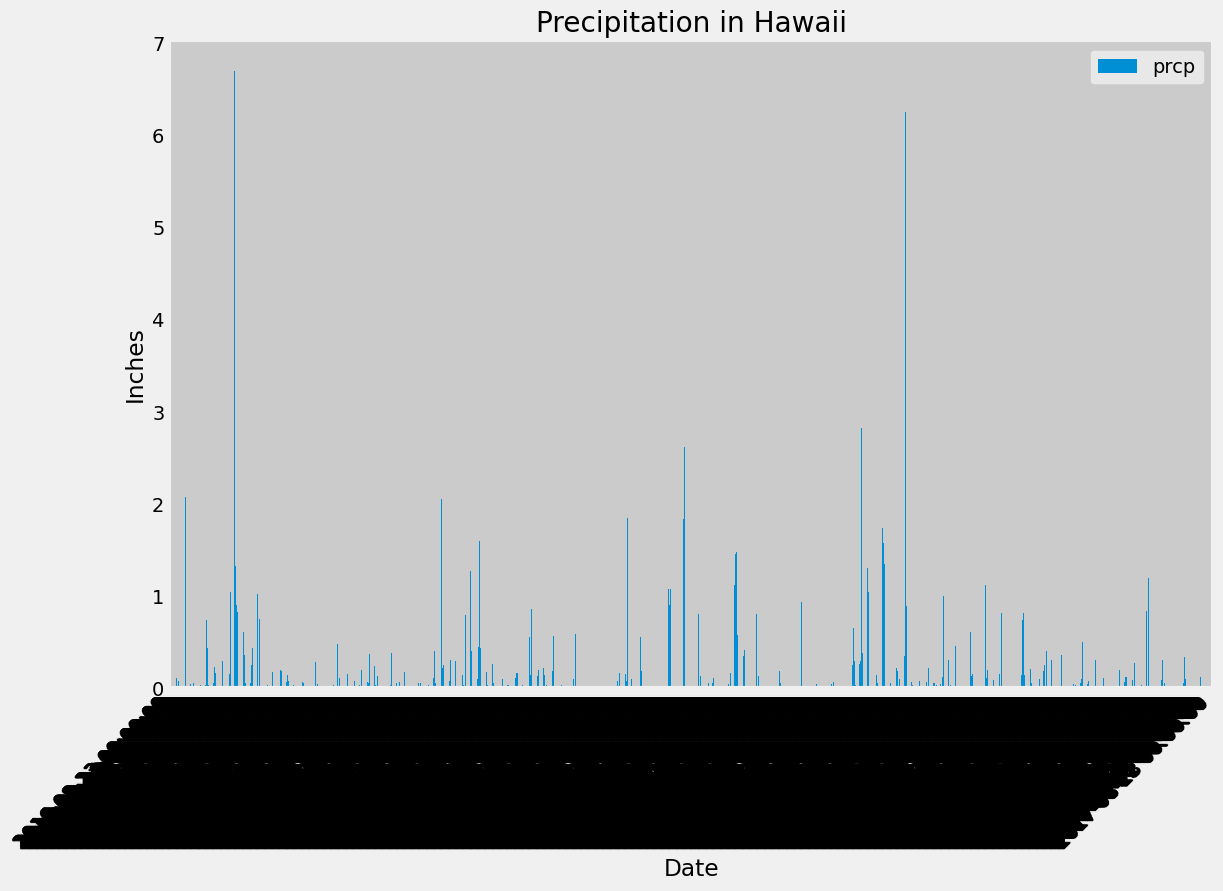

In [15]:
#Plot the results by using the DataFrame plot method, as the following image shows:



df1['date'] = pd.to_datetime(df1['date'])


df1.set_index('date', inplace=True)


df1.sort_index(ascending=True, inplace=True)


df1.plot(kind='bar', figsize=(12, 8))


plt.title("Precipitation in Hawaii")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(rotation=45, ha='right')

plt.show()


In [16]:
#Use Pandas to print the summary statistics for the precipitation data.

summary_stats = df1['prcp'].describe()
summary_df = pd.DataFrame(summary_stats)
print(summary_stats)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: prcp, dtype: float64


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(station.station)).scalar()

total_stations

9

In [24]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)

active_stations = session.query(measurement.station, func.count(measurement.station)).\
    group_by(measurement.station).\
    order_by(func.count(measurement.station).desc()).all()
# List the stations and their counts in descending order.
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_stations[0][0]

temp_stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).\
    filter(measurement.station == most_active_station).all()

temp_stats

[(54.0, 85.0, 71.66378066378067)]

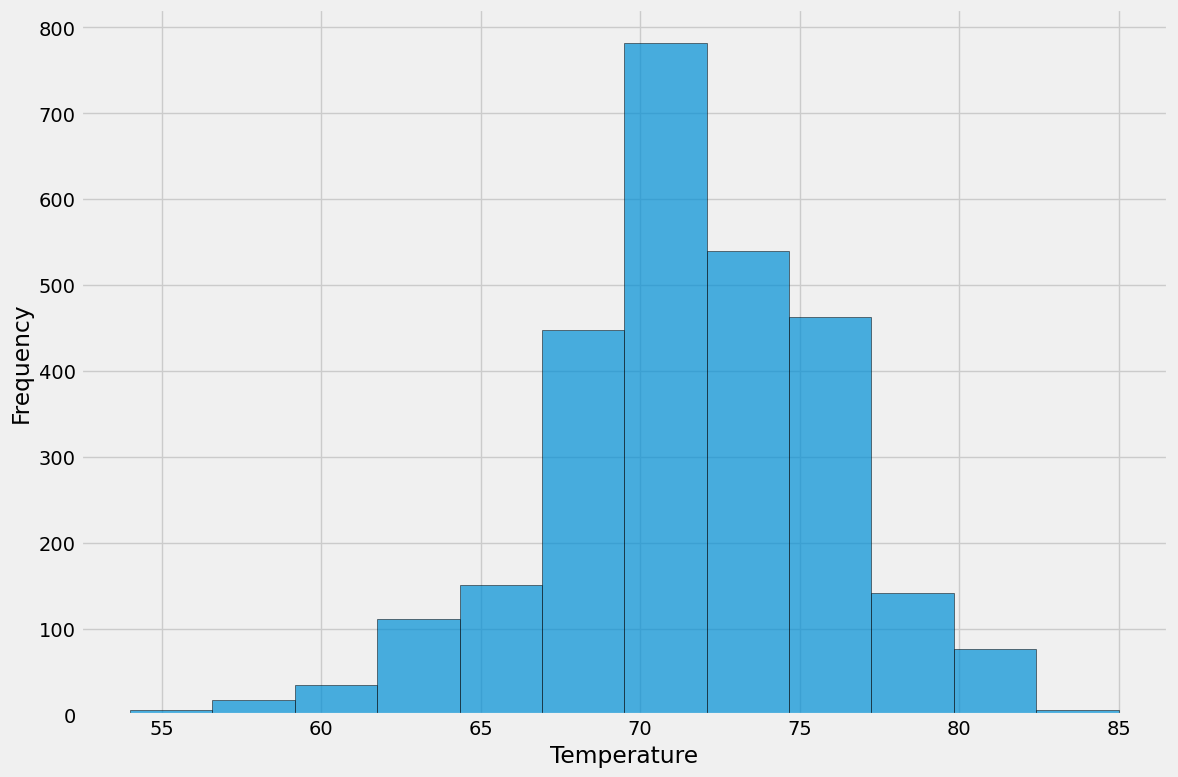

In [28]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
latest_date = pd.to_datetime(latest_date)

one_yr_ago = latest_date - dt.timedelta(days=365)

temp_data = session.query(measurement.date, measurement.tobs).\
    filter(measurement.station == most_active_station).all()

temp_df = pd.DataFrame(temp_data, columns=['date', 'temperature'])

plt.figure(figsize=(12,8))
plt.hist(temp_df['temperature'], bins=12, edgecolor = 'black', alpha=0.7)
plt.title = ('Temperature Observations for Station ' + most_active_station)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


# Close Session

In [29]:
# Close Session
session.close()